# Quantum state tomography with qiskit: Excerpt from qiskit experiment site
### For class 2025 spring "Introduction to quantum information and quantum computing" Seoul National University, Department of Physics and Astronomy Instructor: Dohun Kim 

- This unit is for experiencing state tomography. Note that the following code needs the package qiskit_experiments along with the basic qiskit packages for which the instructor gave the installation workthrough. **Installing qiskit_experiments to your python environment and testing it is homework.**

First make a quantum circuit generating, in this example, two qubit entangled state: singlet state to be exact. And draw the circuit.

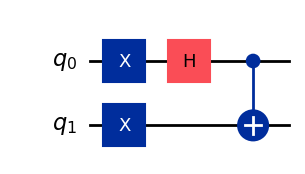

In [28]:
import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

# GHZ State preparation circuit
nq = 2
qc_ghz = qiskit.QuantumCircuit(nq)
qc_ghz.x(0)
qc_ghz.h(0)
qc_ghz.x(1)
for i in range(1, nq):
    qc_ghz.cx(0, i)

# Draw the circuit
qc_ghz.draw(output='mpl')

Next, designate a backend. 

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=token)
backend = service.least_busy(
    operational=True, min_num_qubits=qc_ghz.num_qubits, simulator=False)
print(backend.name)

# local simulator of the backend
from qiskit_aer import AerSimulator
backend_sim = AerSimulator.from_backend(backend)

<IBMBackend('ibm_sherbrooke')>


Run state tomography experiment and print the result. Note here that the StateTomography function is amazing and optimal on its own that we don't need to specify what to measure nor optimize the circuit like we did in exercises before.

In [29]:
# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend_sim, seed_simulation = 100).block_for_results() 

# Print total results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 1.63574219e-02+0.j        ,  3.25520833e-04+0.01692708j,
                 5.73730469e-03+0.00085449j,  1.09863281e-03-0.0032959j ],
               [ 3.25520833e-04-0.01692708j,  4.66227214e-01+0.j        ,
                -4.51293945e-01-0.00134277j,  6.10351563e-04+0.00036621j],
               [ 5.73730469e-03-0.00085449j, -4.51293945e-01+0.00134277j,
                 4.93733724e-01+0.j        , -1.60319010e-02-0.00113932j],
               [ 1.09863281e-03+0.0032959j ,  6.10351563e-04-0.00036621j,
                -1.60319010e-02+0.00113932j,  2.36816406e-02+0.j        ]],
              dims=(2, 2))
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9312744140624973
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- quality: unknown
- extra: <9 items>
- device

In [31]:
# Only obtain the density matrix
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 1.63574219e-02+0.j        ,  3.25520833e-04+0.01692708j,
                 5.73730469e-03+0.00085449j,  1.09863281e-03-0.0032959j ],
               [ 3.25520833e-04-0.01692708j,  4.66227214e-01+0.j        ,
                -4.51293945e-01-0.00134277j,  6.10351563e-04+0.00036621j],
               [ 5.73730469e-03-0.00085449j, -4.51293945e-01+0.00134277j,
                 4.93733724e-01+0.j        , -1.60319010e-02-0.00113932j],
               [ 1.09863281e-03+0.0032959j ,  6.10351563e-04-0.00036621j,
                -1.60319010e-02+0.00113932j,  2.36816406e-02+0.j        ]],
              dims=(2, 2))


We can also visualize the result. Enjoy that the measured density matrix indeed looks very similar to that for a singlet state we just wrote down in the lecture note. 

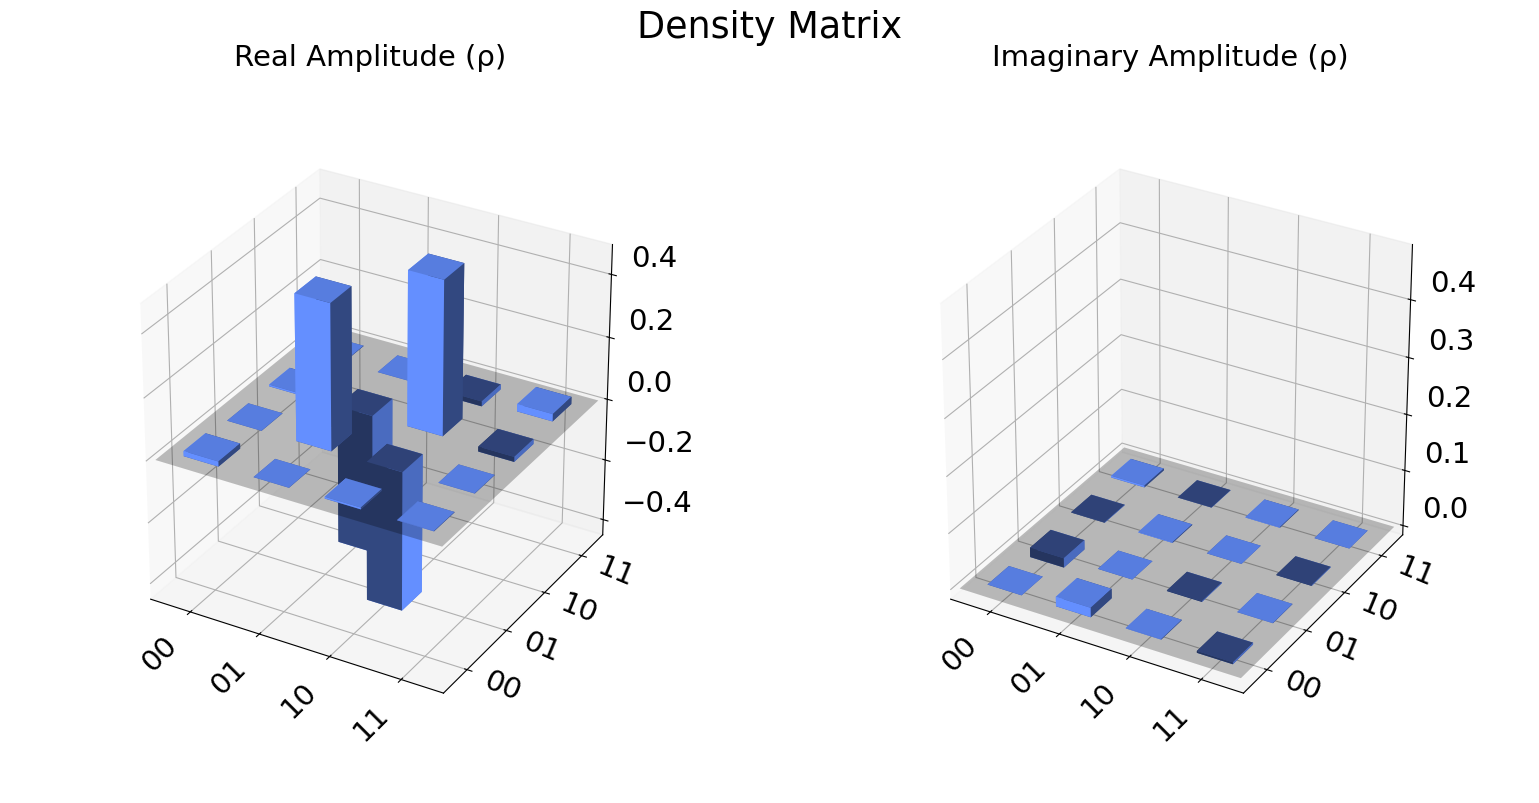

In [32]:
# Visualize the density matrix above
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')

One can also obtain a value known as "fidelity". More details about fidelity will be covered in  later chapters. 

In [33]:
fid_result = qstdata1.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.93127


# DIY 

- Modify the above circuit and generate other two qubit entangled states. Perform tomography and visualize density matrix for each one.
- So far we only dealt up to two qubits. Can you generate three qubit entangled state with above program ? 